In [13]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set(style="whitegrid")
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
import kagglehub
path = kagglehub.dataset_download("rakeshkapilavai/free-fire-weapons-dataset")
print("Path to dataset files:", path)

100%|██████████| 3.03k/3.03k [00:00<00:00, 4.89MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rakeshkapilavai/free-fire-weapons-dataset/versions/1


In [3]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/rakeshkapilavai/free-fire-weapons-dataset/versions/1/weapons_data.csv")
df.head()

,Weapon Name,Ammo Count,Description,Tags,Type
0,RGS50,3,The anti-materiel Launcher (AML) can lock on t...,"HIGH DAMAGE, DESTROYER",Melee
1,MGL140,5,"Grenade launcher with mid-sized magazine, low ...","AREA OF EFFECT, HIGH DAMAGE",Rifle
2,M79,1,"Deals area damage, requires skillful control.","AREA OF EFFECT, PROJECTILE",Launcher
3,GATLING,1200,"Insane fire rate and power, but reduces mobility.","HIGH FIRE POWER, INSANE FIRE RATE",Marksman Rifle
4,M60,68,Large magazines and solid mid-range fire power.,"MID RANGE, HIGH CLIP-SIZE",Projectile


In [34]:
df["Type"].unique()

array(['Melee', 'Rifle', 'Launcher', 'Marksman Rifle', 'Projectile',
       'Pistol', 'Shotgun', 'Sub-machine gun', 'Sniper', 'Machine gun',
       'Bow'], dtype=object)

In [35]:
df["Type"] = df["Type"].replace("Sub-machine gun", "Sub machine gun")

In [36]:
weapon_dummies = pd.get_dummies(df["Type"], prefix="Type")
df = pd.concat([df, weapon_dummies], axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Weapon Name           68 non-null     object
 1   Ammo Count            68 non-null     int64 
 2   Description           68 non-null     object
 3   Tags                  68 non-null     object
 4   Type                  68 non-null     object
 5   Type_Bow              68 non-null     bool  
 6   Type_Launcher         68 non-null     bool  
 7   Type_Machine gun      68 non-null     bool  
 8   Type_Marksman Rifle   68 non-null     bool  
 9   Type_Melee            68 non-null     bool  
 10  Type_Pistol           68 non-null     bool  
 11  Type_Projectile       68 non-null     bool  
 12  Type_Rifle            68 non-null     bool  
 13  Type_Shotgun          68 non-null     bool  
 14  Type_Sniper           68 non-null     bool  
 15  Type_Sub machine gun  68 non-null     bool

In [38]:
df.describe()

,Ammo Count
count,68.000000
mean,38.985294
std,144.409709
min,0.000000
25%,5.000000
50%,16.500000
75%,38.000000
max,1200.000000


In [39]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Weapon Name             0
Ammo Count              0
Description             0
Tags                    0
Type                    0
Type_Bow                0
Type_Launcher           0
Type_Machine gun        0
Type_Marksman Rifle     0
Type_Melee              0
Type_Pistol             0
Type_Projectile         0
Type_Rifle              0
Type_Shotgun            0
Type_Sniper             0
Type_Sub machine gun    0
dtype: int64


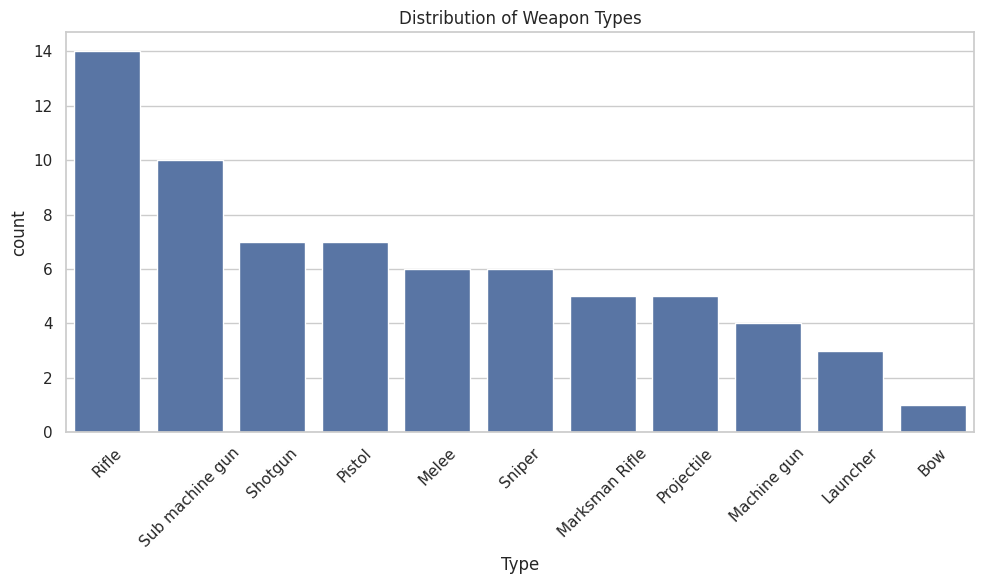

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
plt.title('Distribution of Weapon Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

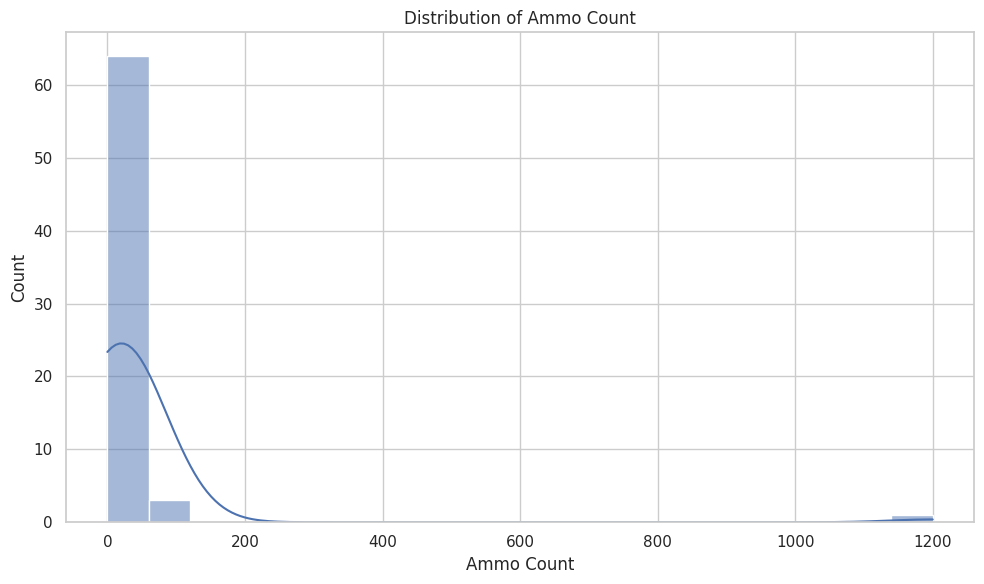

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Ammo Count', kde=True, bins=20)
plt.title('Distribution of Ammo Count')
plt.tight_layout()
plt.show()

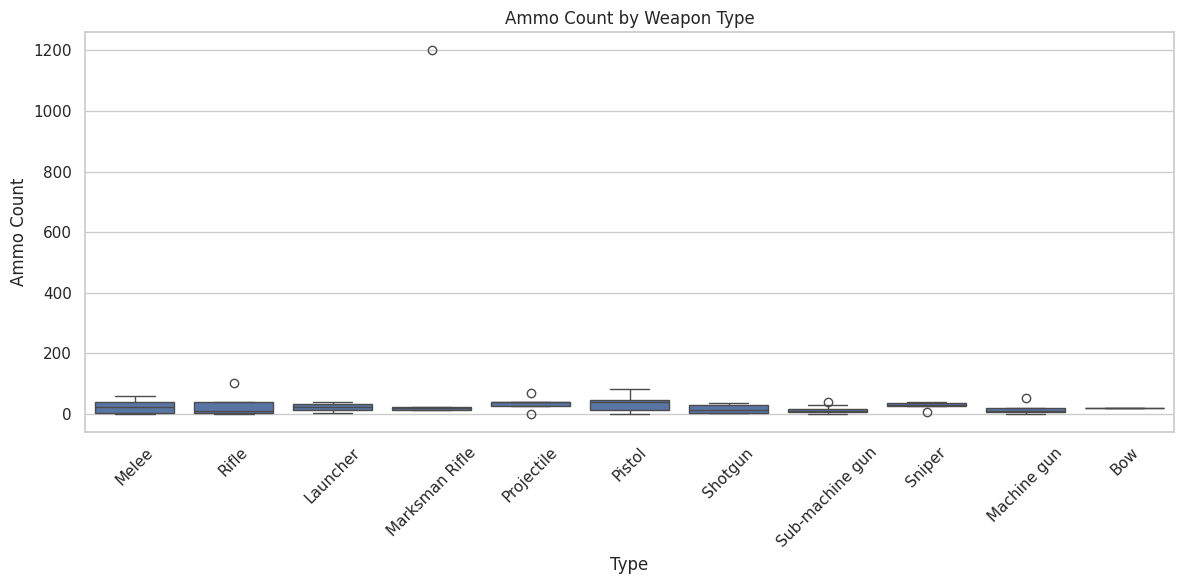

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type', y='Ammo Count')
plt.title('Ammo Count by Weapon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f'Removed {initial_shape[0] - df.shape[0]} duplicate rows')

Removed 0 duplicate rows


In [42]:
df.dropna(inplace=True)
print('New shape after dropping missing values:', df.shape)

New shape after dropping missing values: (68, 16)


In [47]:
X = df[["Ammo Count"]].to_numpy().astype(np.float32)
y = weapon_dummies.to_numpy().astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [51]:
input_layer = layers.Input(shape=(1,))
x = layers.Dense(32, activation='relu')(input_layer)
x = layers.Dense(16, activation='relu')(x)
output_layer = layers.Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779 (3.04 KB)

 Trainable params: 779 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer="adam",loss="mae")
history=model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.0518 - loss: 0.1668 - val_accuracy: 0.2727 - val_loss: 0.1562
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0778 - loss: 0.1671 - val_accuracy: 0.2727 - val_loss: 0.1570
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0778 - loss: 0.1655 - val_accuracy: 0.1818 - val_loss: 0.1601
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0778 - loss: 0.1657 - val_accuracy: 0.0909 - val_loss: 0.1621
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1037 - loss: 0.1660 - val_accuracy: 0.0909 - val_loss: 0.1631
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1037 - loss: 0.1658 - val_accuracy: 0.0909 - val_loss: 0.1631


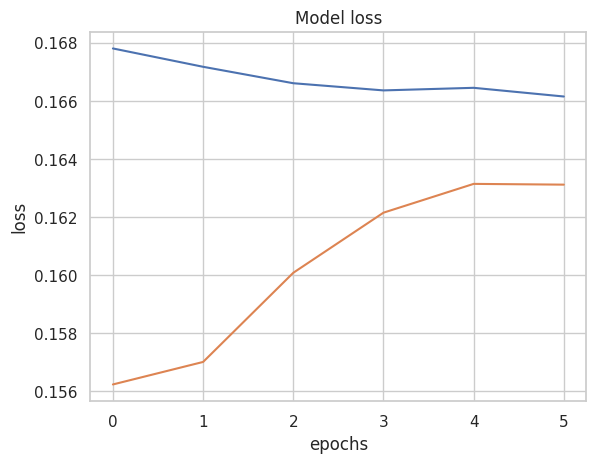

In [53]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Model loss")
plt.show()

In [57]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))

Accuracy: 0.14285714285714285

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.08      1.00      0.15         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2

    accuracy                           0.14        14
   macro avg       0.06      0.17      0.07        14
weighted avg       0.08      0.14      0.08        14



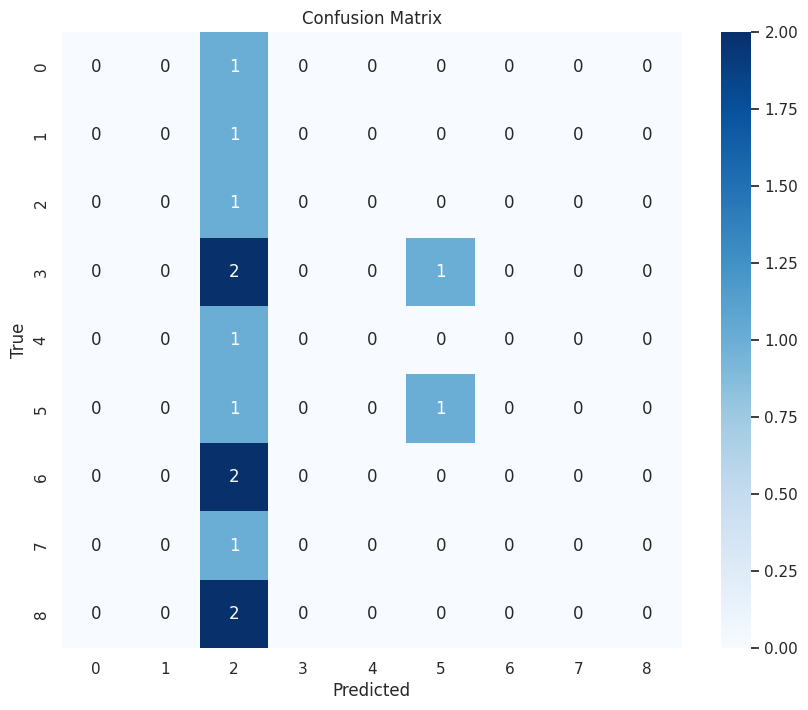

In [58]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [59]:
new_ammo = np.array([[50]], dtype=np.float32)
pred = model.predict(new_ammo)
predicted_type = weapon_dummies.columns[np.argmax(pred)]
print("Predicted Weapon Type:", predicted_type)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Weapon Type: Type_Melee
